In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression - we have NaNs so this and GB Regressor won't work

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

# Read, pre-process and visualize data

In [2]:
data_set = pd.read_csv("MultipleSources-2019-2025.csv")
data_set.head()

,Date,SP500,Futures,Nikkei,FTSE,DAX
0,2025-04-02,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1,2025-04-01,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
2,2025-03-31,"5,611.85","5,653.25","35,617.56","8,582.81","22,163.49"
3,2025-03-28,"5,580.94","5,623.00","37,120.33","8,658.85","22,461.52"
4,2025-03-27,"5,693.31","5,739.25","37,799.97","8,666.12","22,678.74"


In [3]:
len(data_set)
data_set.isna().sum()
data_set.dtypes

1509

Date        0
SP500       0
Futures     0
Nikkei     98
FTSE       30
DAX        24
dtype: int64

Date        object
SP500      float64
Futures    float64
Nikkei     float64
FTSE       float64
DAX        float64
dtype: object

In [4]:
data_set.columns

# Step 1: Ensure the 'Date' column is in datetime format
data_set['Date'] = pd.to_datetime(data_set['Date'])

# Step 2: Convert datetime to integer timestamp (in seconds)
data_set['Date'] = data_set['Date'].astype(np.int64) // 10**9

data_set.tail()

scores = {'hybrid':0, 'xg':0, 'dt':0, 'bg':0, 'rf':0, 'hist':0}

Index(['Date', 'SP500', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

,Date,SP500,Futures,Nikkei,FTSE,DAX
1504,1554768000,"2,878.20","2,882.50","21,802.59","7,425.57","11,850.57"
1505,1554681600,"2,895.77","2,898.25","21,761.65","7,451.89","11,963.40"
1506,1554422400,"2,892.74","2,896.00","21,807.50","7,446.87","12,009.75"
1507,1554336000,"2,879.39","2,882.75","21,724.95","7,401.94","11,988.01"
1508,1554249600,"2,873.40","2,879.75","21,713.21","7,418.28","11,954.40"


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(columns = ['SP500']), data_set['SP500'], test_size=0.2, random_state=50)
X_train
X_test
y_train
y_test

,Date,Futures,Nikkei,FTSE,DAX
232,1714348800,"5,147.00",NaN,"8,147.03","18,118.32"
1314,1578528000,"3,276.00","23,739.87","7,598.12","13,495.06"
741,1650326400,"4,459.25","26,985.09","7,601.28","14,153.46"
1231,1588896000,"2,928.50","20,179.09",NaN,"10,904.48"
610,1666656000,"3,870.25","27,250.28","7,013.48","13,052.96"
...,...,...,...,...,...
70,1734480000,"5,872.25","39,081.71","8,199.11","20,242.57"
132,1726790400,"5,699.99","37,723.91","8,229.99","18,720.01"
1313,1578614400,"3,264.75","23,850.57","7,587.85","13,483.31"
109,1729641600,"5,837.75","38,104.86","8,258.64","19,377.62"


,Date,Futures,Nikkei,FTSE,DAX
288,1707264000,"5,015.25","36,119.92","7,628.75","16,921.96"
965,1622160000,"4,202.50","29,149.41","7,022.61","15,519.98"
1090,1606435200,"3,636.50","26,644.71","6,367.58","13,335.68"
191,1719446400,"5,546.00","39,341.54","8,179.68","18,210.55"
453,1686528000,"4,342.75","32,434.00","7,570.69","16,097.87"
...,...,...,...,...,...
539,1675728000,"4,175.75","27,685.47","7,864.71","15,320.88"
1235,1588550400,"2,825.25",NaN,"5,753.78","10,466.80"
497,1681084800,"4,136.25","27,633.66",NaN,NaN
296,1706227200,"4,916.25","35,751.07","7,635.09","16,961.39"


232    5,116.17
1314   3,274.70
741    4,462.21
1231   2,929.80
610    3,859.11
         ...   
70     5,872.16
132    5,702.55
1313   3,265.35
109    5,797.42
1504   2,878.20
Name: SP500, Length: 1207, dtype: float64

288    4,995.06
965    4,204.11
1090   3,638.35
191    5,482.87
453    4,338.93
         ...   
539    4,164.00
1235   2,842.74
497    4,109.11
296    4,890.97
1038   3,934.83
Name: SP500, Length: 302, dtype: float64

# Decison tree


In [6]:
clf = DecisionTreeRegressor(random_state=50)

clf = clf.fit(X_train, y_train) 

In [7]:
X_train.columns
clf.feature_importances_

Index(['Date', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

array([7.60832339e-05, 9.99658237e-01, 1.81359688e-04, 6.22487369e-05,
       2.20711814e-05])

In [8]:
test_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
dt = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['dt'] = mean_absolute_error
scores

,pred_spx,SP500
288,"5,000.62","4,995.06"
965,"4,195.99","4,204.11"
1090,"3,635.41","3,638.35"
191,"5,475.09","5,482.87"
453,"4,327.78","4,338.93"


Mean absolute error is 
9.033476821192066


{'hybrid': 0,
 'xg': 0,
 'dt': np.float64(9.033476821192066),
 'bg': 0,
 'rf': 0,
 'hist': 0}

## Bagging Regressor ## 

In [9]:
regr = BaggingRegressor(random_state=50, n_estimators = 200, max_samples = 1000)

regr = regr.fit(X_train, y_train) 

In [10]:
test_output = pd.DataFrame(regr.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
bg = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['bg'] = mean_absolute_error

,pred_spx,SP500
288,"4,981.59","4,995.06"
965,"4,198.88","4,204.11"
1090,"3,634.11","3,638.35"
191,"5,485.06","5,482.87"
453,"4,336.93","4,338.93"


Mean absolute error is 
8.152711092715036


## Random Forest Regressor 

In [11]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, y_train) 


In [12]:
X_train.columns
rf.feature_importances_

Index(['Date', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

array([0.29595133, 0.4259416 , 0.11283519, 0.01997037, 0.14530151])

In [13]:
test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
rf = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['rf'] = mean_absolute_error

,pred_spx,SP500
288,"4,965.60","4,995.06"
965,"4,202.48","4,204.11"
1090,"3,625.72","3,638.35"
191,"5,474.76","5,482.87"
453,"4,343.72","4,338.93"


Mean absolute error is 
14.605712320374524


## HistGradBoosting Regressor

In [14]:
gb = HistGradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4) #GradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4)

gb = gb.fit(X_train, y_train) 


In [15]:
X_train.columns
#gb.feature_importances_

Index(['Date', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

In [16]:
test_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
hist = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['hist'] = mean_absolute_error

,pred_spx,SP500
288,"4,967.02","4,995.06"
965,"4,208.56","4,204.11"
1090,"3,628.26","3,638.35"
191,"5,503.11","5,482.87"
453,"4,333.92","4,338.93"


Mean absolute error is 
8.669035481129013


## XGBoost Regressor 

In [17]:
# XGBoost comes with its own class for storing datasets called DMatrix. 
# It is a highly optimized class for memory and speed. 
# That's why converting datasets into this format is a requirement for the native XGBoost API:


# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [18]:
params = {"objective": "reg:squarederror", "tree_method": "exact", "max_depth" : 4, "learning_rate" : 0.1} # use "tree_method" : "hist" if you need speed

In [19]:
n = 100

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

In [20]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)


In [21]:
test_output = pd.DataFrame(preds, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
xg = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()
print(xg)

scores['xg'] = mean_absolute_error
print(scores)

,pred_spx,SP500
288,"4,980.50","4,995.06"
965,"4,208.14","4,204.11"
1090,"3,640.04","3,638.35"
191,"5,480.75","5,482.87"
453,"4,342.12","4,338.93"


Mean absolute error is 
8.028752360564981
0.0019108126477512194
{'hybrid': 0, 'xg': np.float64(8.028752360564981), 'dt': np.float64(9.033476821192066), 'bg': np.float64(8.152711092715036), 'rf': np.float64(14.605712320374524), 'hist': np.float64(8.669035481129013)}


## Hybrid Model 

In [22]:
model = HistGradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4) #LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

HistGradientBoostingRegressor(max_depth=4, min_samples_leaf=2, random_state=50)

0.9999069715735204

In [23]:
training_residuals = y_train - model.predict(X_train)

In [24]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, training_residuals) 

In [25]:
pred_residuals = rf.predict(X_test)
y_pred = pred_residuals + model.predict(X_test)

In [26]:
test_output = pd.DataFrame(y_pred, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
hybrid = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()

scores['hybrid'] = mean_absolute_error

,pred_spx,SP500
288,"4,963.90","4,995.06"
965,"4,205.42","4,204.11"
1090,"3,630.40","3,638.35"
191,"5,498.18","5,482.87"
453,"4,336.46","4,338.93"


Mean absolute error is 
8.18358774768234


## Plotting a Graph for Comparing Results


{'hybrid': np.float64(8.18358774768234), 'xg': np.float64(8.028752360564981), 'dt': np.float64(9.033476821192066), 'bg': np.float64(8.152711092715036), 'rf': np.float64(14.605712320374524), 'hist': np.float64(8.669035481129013)}
['hybrid', 'xg', 'dt', 'bg', 'rf', 'hist']
[np.float64(8.18358774768234), np.float64(8.028752360564981), np.float64(9.033476821192066), np.float64(8.152711092715036), np.float64(14.605712320374524), np.float64(8.669035481129013)]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Mean Absolute Error (MAE) Across Models')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'MAE (lower is better)')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'hybrid'),
  Text(1, 0, 'xg'),
  Text(2, 0, 'dt'),
  Text(3, 0, 'bg'),
  Text(4, 0, 'rf'),
  Text(5, 0, 'hist')])

Text(0.0, 8.68358774768234, '8.18')

Text(1.0, 8.528752360564981, '8.03')

Text(2.0, 9.533476821192066, '9.03')

Text(3.0, 8.652711092715036, '8.15')

Text(4.0, 15.105712320374524, '14.61')

Text(5.0, 9.169035481129013, '8.67')

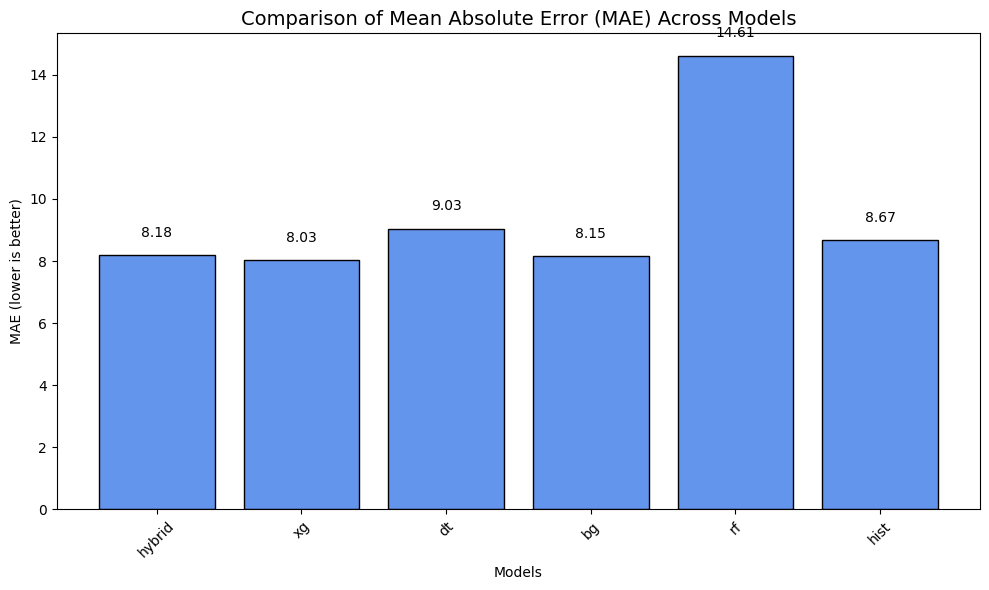

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

print(scores)

model_names = []
mae = []
for key in scores:
    model_names.append(key)
    mae.append(scores[key])

print(model_names)
print(mae)


# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae, color='cornflowerblue', edgecolor='black')
plt.title('Comparison of Mean Absolute Error (MAE) Across Models', fontsize=14)
plt.xlabel('Models')
plt.ylabel('MAE (lower is better)')
plt.xticks(rotation=45)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
